In [14]:
!pip install missingno

In [15]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [16]:
train = pd.read_csv("./data/Train.csv")
test = pd.read_csv("./data/test.csv")

In [17]:
trainDf=pd.DataFrame(train)
testDf=pd.DataFrame(test)

In [18]:
trainDf

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
1,2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
2,3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
3,4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
4,5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6995,6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6996,6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0
6997,6998,A,Road,3.0,1,232,2.0,medium,M,NaN,4719,0


In [19]:
import missingno as msno

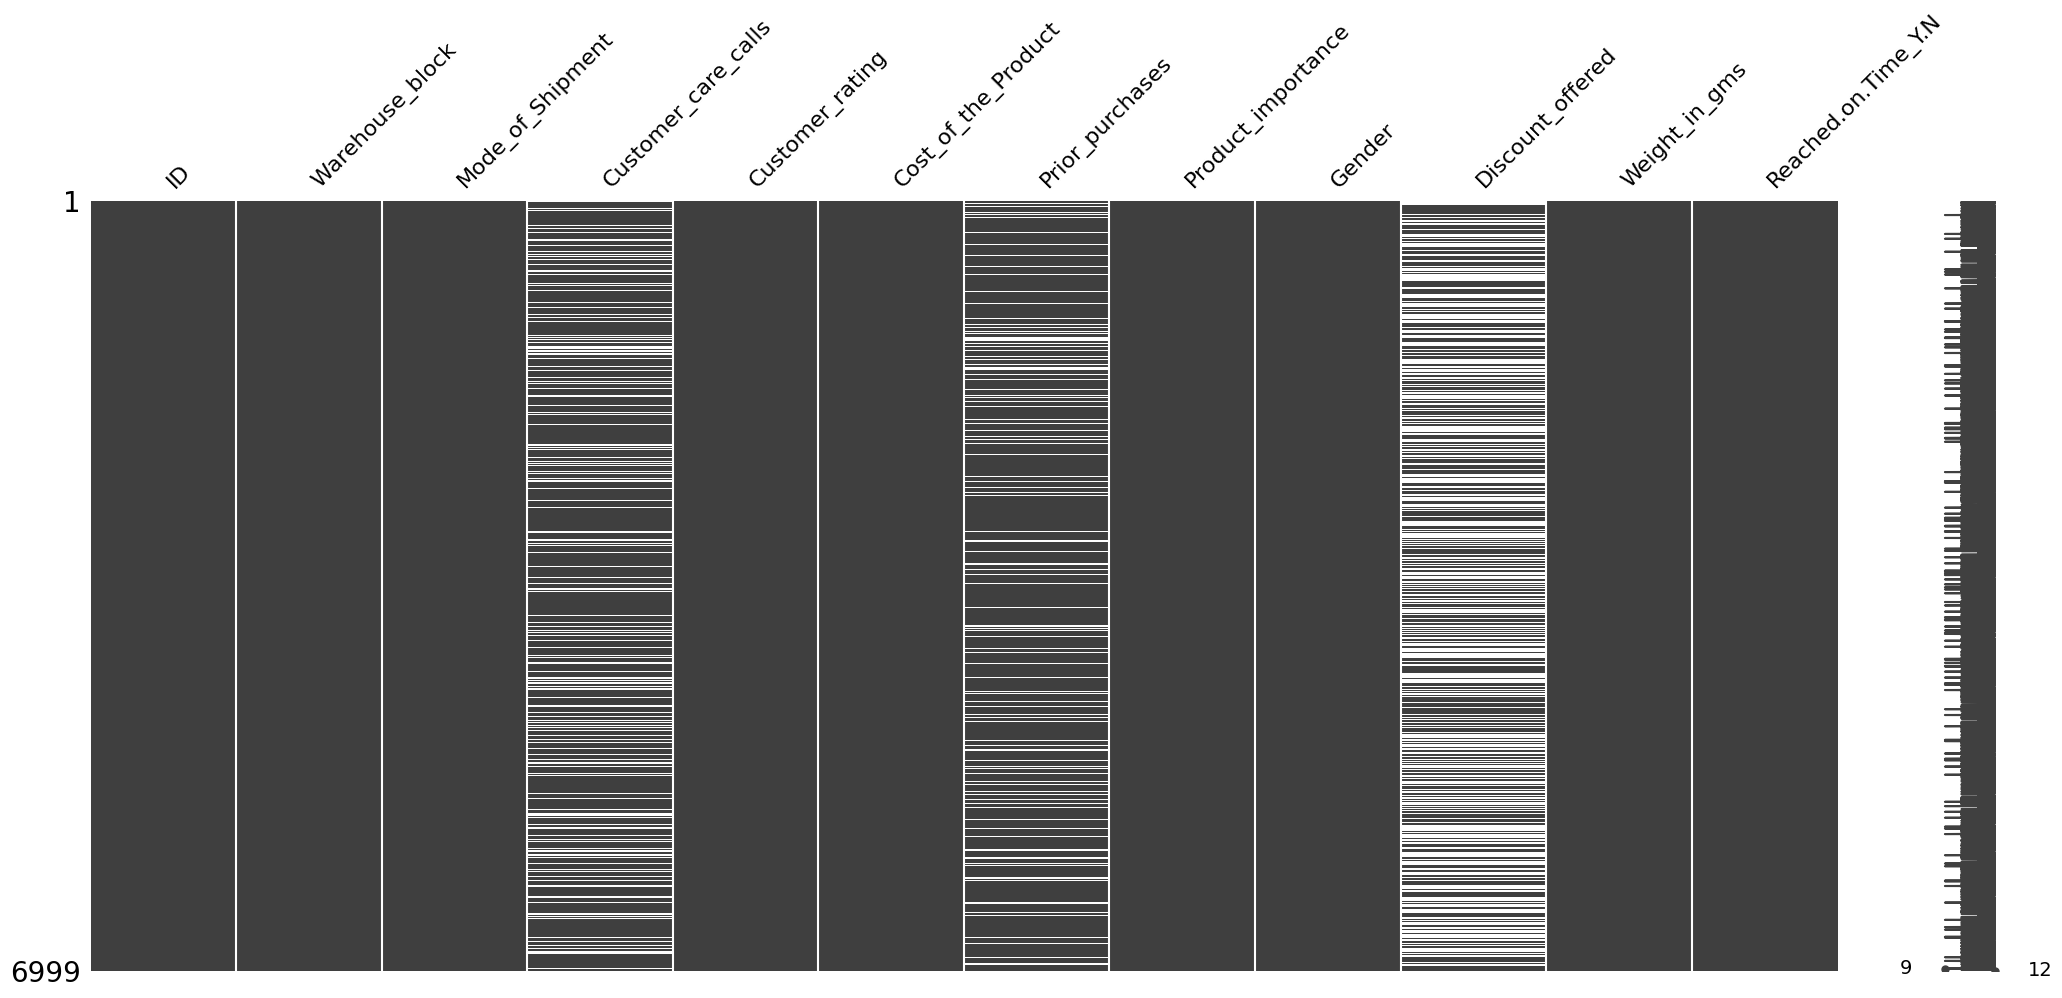

In [20]:
msno.matrix(train)
plt.show()


**DF 다 추가해주거라..**

In [21]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  5423 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6049 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     3468 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


In [22]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4000 non-null   int64  
 1   Warehouse_block      4000 non-null   object 
 2   Mode_of_Shipment     4000 non-null   object 
 3   Customer_care_calls  3144 non-null   float64
 4   Customer_rating      4000 non-null   int64  
 5   Cost_of_the_Product  4000 non-null   int64  
 6   Prior_purchases      3633 non-null   float64
 7   Product_importance   4000 non-null   object 
 8   Gender               4000 non-null   object 
 9   Discount_offered     2085 non-null   float64
 10  Weight_in_gms        4000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 343.9+ KB


In [23]:
train.isnull().sum(axis=0)

ID                        0
Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls    1576
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases         950
Product_importance        0
Gender                    0
Discount_offered       3531
Weight_in_gms             0
Reached.on.Time_Y.N       0
dtype: int64

In [24]:
trainDf['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
 Ship        4508
 Road        1075
 Flight      1039
?             373
 Shipzk         2
 Flightzk       1
 Roadzk         1
Name: count, dtype: int64

In [25]:
testDf['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
 Ship      2551
 Flight     631
 Road       595
?           221
 Shipzk       1
 Roadzk       1
Name: count, dtype: int64

# 시작


### 전처리

In [26]:
#warehouse block 이름 수정
trainDf.rename(columns={'Warehouse_block ':'Warehouse_block'}, inplace=True)
testDf.rename(columns={'Warehouse_block ':'Warehouse_block'}, inplace=True)

In [27]:

trainDf['Cost_of_the_Product'].median()


214.0

In [28]:
trainDf['Cost_of_the_Product'].replace(9999, 214, inplace=True)


In [29]:
trainDf['Cost_of_the_Product'].unique()

array([135, 225, 229, 228, 195, 171, 282, 161, 274, 222, 264, 196, 232,
       194, 207, 146, 221, 134, 254, 160, 273, 142, 224, 253, 209, 247,
       239, 215, 177, 189, 139, 184, 121, 133, 158, 286, 281, 261, 214,
       180, 169, 280, 166, 172, 212, 246, 154, 203, 296, 185, 249, 269,
       213, 263, 267, 164, 178, 268, 278, 141, 140, 241, 105, 197, 193,
       231, 237, 305, 210, 138, 226, 151, 309, 255, 152, 186, 136, 244,
       252, 111, 248, 202, 174, 272, 182, 181, 173, 242, 294, 198, 208,
       301, 270, 130, 259, 236, 250, 223, 183, 148, 243, 262, 201, 199,
       156, 145, 150, 132, 137, 276, 256, 290, 200, 258, 170, 227, 240,
       157, 165, 175, 233, 289, 191, 277, 275, 190, 163, 266, 206, 217,
       220, 219, 218, 187, 298, 162, 295, 234, 176, 245, 238, 143, 265,
       112, 125, 128, 102,  97, 204, 211, 123, 307, 144, 271, 149, 159,
       230, 257, 167,  98, 287, 192, 216, 205, 188, 103, 147, 104, 310,
       304, 292, 179, 124, 260, 168, 109, 107, 235, 308, 114, 15

In [30]:
testDf['Cost_of_the_Product'].replace(9999, 214, inplace=True)


In [31]:
testDf['Cost_of_the_Product'].unique()

array([274, 136, 140, 291, 147, 221, 253, 244, 150, 175, 235, 257, 204,
       211, 258, 210, 226, 290, 148, 225, 206, 205, 199, 247, 266, 133,
       251, 220, 181, 209, 263, 152, 246, 260, 178, 151, 256, 267, 229,
       180, 238, 160, 241, 166, 135, 167, 265, 149, 191, 216, 218, 170,
       301, 208, 285, 134, 156, 174, 185, 264, 245, 154, 213, 292, 217,
       192, 248, 270, 172, 142, 277, 255, 162, 139, 234, 239, 179, 164,
       232, 202, 143, 233, 165, 262, 138, 294, 271, 117, 171, 252, 168,
       173, 228, 254, 237, 144, 212, 289, 137, 190, 201, 222, 159, 231,
       223, 198, 269, 243, 293, 224, 187, 115, 249, 193, 296, 189, 195,
       214, 275, 215, 242,  98, 203, 188, 153, 129, 176, 141, 236, 163,
       169, 118, 119, 196, 250, 194, 182, 282, 184, 125, 286, 200, 273,
       219, 278, 207, 268, 186, 230, 121, 106, 197, 108, 146, 177, 240,
       158, 276, 309, 287, 227, 279, 272, 111, 155, 302, 283, 161, 261,
       303, 130, 304, 306, 157,  97, 298, 259, 280, 124, 310, 14

In [32]:
# 데이터 공백 및 오류 수정

In [33]:
trainDf['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [34]:

trainDf['Mode_of_Shipment'].replace(' Ship', 'Ship', inplace=True)
trainDf['Mode_of_Shipment'].replace(' Flight', 'Flight', inplace=True)
trainDf['Mode_of_Shipment'].replace(' Road', 'Road', inplace=True)
trainDf['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)
trainDf['Mode_of_Shipment'].replace(' Shipzk', 'Ship', inplace=True)
trainDf['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace=True)
trainDf['Mode_of_Shipment'].replace(' Flightzk', 'Flight', inplace=True)

testDf['Mode_of_Shipment'].replace(' Ship', 'Ship', inplace=True)
testDf['Mode_of_Shipment'].replace(' Flight', 'Flight', inplace=True)
testDf['Mode_of_Shipment'].replace(' Road', 'Road', inplace=True)
testDf['Mode_of_Shipment'].replace('?', 'Ship', inplace=True)
testDf['Mode_of_Shipment'].replace(' Shipzk', 'Ship', inplace=True)
testDf['Mode_of_Shipment'].replace(' Flightzk', 'Flight', inplace=True)
testDf['Mode_of_Shipment'].replace(' Roadzk', 'Road', inplace=True)


In [35]:
# 결측치 채우기 위해 컬럼별 중앙값, 평균값 확인
print(trainDf['Customer_care_calls'].median())
print(trainDf['Customer_care_calls'].mean())

print(trainDf['Prior_purchases'].median())
print(trainDf['Prior_purchases'].mean())

print(trainDf['Discount_offered'].median())
print(trainDf['Discount_offered'].mean())

4.0
4.054582334501198
3.0
3.5762936022483056
7.0
13.269031141868512


In [36]:
# Customer_care_calls 결측치 채우기
trainDf['Customer_care_calls']= trainDf['Customer_care_calls'].fillna(4)
testDf['Customer_care_calls']= testDf['Customer_care_calls'].fillna(4)

# Prior_purchases 결측치 채우기
trainDf['Prior_purchases'] = trainDf['Prior_purchases'].fillna(3)
testDf['Prior_purchases'] = testDf['Prior_purchases'].fillna(3)


In [37]:

print(train['Customer_rating'].median())
print(train['Customer_rating'].mean())

3.0
3.023717673953422


In [38]:
# 이상치 중앙값으로 수정
trainDf['Customer_rating'].replace(99, 3, inplace=True)
testDf['Customer_rating'].replace(99, 3, inplace=True)

# trainDf['Product_importance'].value_counts()

In [39]:
#product importance ? 다 medium으로 바꾸기

In [40]:
trainDf['Product_importance'].value_counts()


Product_importance
low        3344
medium     2982
high        573
?            97
mediumm       1
loww          1
highh         1
Name: count, dtype: int64

In [41]:
trainDf['Product_importance'].replace('mediumm', 'medium', inplace=True)
trainDf['Product_importance'].replace('loww', 'low', inplace=True)
trainDf['Product_importance'].replace('highh', 'high', inplace=True)
trainDf['Product_importance'].replace('?', 'medium', inplace=True)
testDf['Product_importance'].replace('mediumm', 'medium', inplace=True)
testDf['Product_importance'].replace('?', 'medium', inplace=True)

In [42]:
#Weight_in_gms

In [43]:
trainDf['Weight_in_gms'].value_counts()

Weight_in_gms
?       446
1817      8
1367      8
5709      7
1861      7
       ... 
4964      1
5612      1
2443      1
2497      1
1480      1
Name: count, Length: 3332, dtype: int64

In [44]:
# Weight_in_gms 데이터 '?'-> 0
trainDf['Weight_in_gms'].replace('?', 0, inplace=True)
testDf['Weight_in_gms'].replace('?', 0, inplace=True)

In [45]:
# Weight_in_gms 데이터 object -> int64
trainDf['Weight_in_gms'] = pd.to_numeric(trainDf['Weight_in_gms'])
testDf['Weight_in_gms'] = pd.to_numeric(testDf['Weight_in_gms'])

In [46]:
trainDf['Weight_in_gms'].mean()


3423.7699671381624

In [47]:
trainDf['Weight_in_gms']= trainDf['Weight_in_gms'].replace(0, 3423)
testDf['Weight_in_gms']= testDf['Weight_in_gms'].replace(0, 3423)

In [48]:
# ID 컬럼 삭제
trainDf.drop("ID",axis=1,inplace=True)
testDf.drop("ID",axis=1,inplace=True)


In [49]:
# Discount_offered 컬럼 제거
trainDf.drop('Discount_offered', axis=1, inplace=True)
testDf.drop('Discount_offered', axis=1, inplace=True)


In [50]:
# Gender 컬럼 제거
trainDf.drop("Gender",axis=1,inplace=True)
testDf.drop("Gender",axis=1,inplace=True)

In [51]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Weight_in_gms        6999 non-null   int64  
 8   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 492.2+ KB


In [52]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Weight_in_gms        6999 non-null   int64  
 8   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 492.2+ KB


In [53]:
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      4000 non-null   object 
 1   Mode_of_Shipment     4000 non-null   object 
 2   Customer_care_calls  4000 non-null   float64
 3   Customer_rating      4000 non-null   int64  
 4   Cost_of_the_Product  4000 non-null   int64  
 5   Prior_purchases      4000 non-null   float64
 6   Product_importance   4000 non-null   object 
 7   Weight_in_gms        4000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 250.1+ KB


### 인코딩


In [54]:
# 범주형 데이터 원핫인코딩

In [55]:
category=['Warehouse_block','Mode_of_Shipment','Product_importance']
one_hot_train = pd.get_dummies(trainDf[category])
one_hot_test = pd.get_dummies(testDf[category])


In [56]:

# 원학인코딩후 기존컬럼 제거
trainDf.drop(category, axis=1, inplace=True)
testDf.drop(category, axis=1, inplace=True)


In [57]:
# 원핫인코딩 컬럼 합치기
trainDf=pd.concat([trainDf,one_hot_train], axis=1)
testDf=pd.concat([testDf,one_hot_test], axis=1)


In [58]:
trainDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Weight_in_gms              6999 non-null   int64  
 5   Reached.on.Time_Y.N        6999 non-null   int64  
 6   Warehouse_block_A          6999 non-null   bool   
 7   Warehouse_block_B          6999 non-null   bool   
 8   Warehouse_block_C          6999 non-null   bool   
 9   Warehouse_block_D          6999 non-null   bool   
 10  Warehouse_block_F          6999 non-null   bool   
 11  Mode_of_Shipment_Flight    6999 non-null   bool   
 12  Mode_of_Shipment_Road      6999 non-null   bool   
 13  Mode_of_Shipment_Ship      6999 non-null   bool 

### 문제와 답 분리

In [59]:
len(test)

4000

In [60]:

X_train = trainDf.drop('Reached.on.Time_Y.N', axis=1)
y_train = trainDf['Reached.on.Time_Y.N']
X_test = testDf

In [61]:
X_test

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,3.0,1,274,3.0,4352,False,False,False,False,True,False,False,True,True,False,False
1,3.0,4,136,2.0,1056,False,False,False,False,True,False,False,True,False,False,True
2,4.0,5,140,3.0,5383,True,False,False,False,False,True,False,False,False,True,False
3,4.0,1,291,4.0,1880,False,False,True,False,False,False,False,True,False,True,False
4,4.0,2,147,3.0,5174,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,1,204,4.0,1667,True,False,False,False,False,False,False,True,False,False,True
3996,4.0,3,195,2.0,3869,False,False,True,False,False,False,False,True,False,False,True
3997,4.0,3,206,2.0,4531,False,True,False,False,False,True,False,False,False,False,True
3998,6.0,4,255,4.0,1869,False,False,True,False,False,False,False,True,False,True,False


### 모델링

**XG, lightGBM 해보자**


### grid_search 해보자

In [68]:
#그리드 서치 모듈 불러오기
from sklearn.model_selection import GridSearchCV

In [69]:
tree=LGBMClassifier()

In [70]:
param_tree = {
    'n_estimators': range(100,501,100),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05],
    'num_leaves': [3,4,5,6,7],
    'max_depth' : range(1,6),
}

In [71]:
#그리드 서치 객체 만들기
#GridSearchCV(모델, 하이퍼 파라미터 목록, cv = ?)
grid_search_tree=GridSearchCV(tree,
                             param_tree,
                              cv=5
                             )

In [74]:
#모든 조합식을 검사하는 중. 
grid_search_tree.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.59

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.59

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, numbe

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.38

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negat

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choos

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.38

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_row_wise=true`

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.38

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choos

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.38

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.59

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.59

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightGBM] [Info] Start training from score 0.383633
[LightGBM] [Info] Number of positive: 3330, number of negative: 2269
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594749 -> initscore=0.383633
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightG

[LightGBM] [Info] Number of positive: 3330, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594643 -> initscore=0.383192
[LightGBM] [Info] Start training from score 0.383192
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] 

[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594570 -> initscore=0.382892
[LightGBM] [Info] Start training from score 0.382892
[LightGBM] [Info] Number of positive: 3329, number of negative: 2270
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 505
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 16
[LightGBM] [Info] [bin

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'max_depth': range(1, 6),
                         'n_estimators': range(100, 501, 100),
                         'num_leaves': [3, 4, 5, 6, 7]})

In [75]:
grid_search_tree.best_params_


{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 6}

In [76]:
grid_search_tree.best_score_


0.6782440518737874

In [77]:
best_tree=grid_search_tree.best_estimator_

In [78]:
best_tree.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 4162, number of negative: 2837
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 6999, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.594656 -> initscore=0.383249
[LightGBM] [Info] Start training from score 0.383249


LGBMClassifier(learning_rate=0.03, max_depth=5, num_leaves=6)

In [79]:
pre=best_tree.predict(X_test)

In [80]:
pre


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
# 답안지 작성

omr=pd.read_csv('./data/sampleSubmission.csv')
omr['Reached.on.Time_Y.N']=pre


In [83]:
omr.to_csv('best_tree_LGBM.csv',index=False)

In [110]:
omr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4000 non-null   int64  
 1   Reached.on.Time_Y.N  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [113]:
len(omr)

4000

In [114]:
len(pre)

3999